In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from config.config import NASA_API_KEY
from api_methods import closes_approach, get_apod_image

NASA'nın Astronomy Picture of the Day (APOD) API'sini kullanarak belirli bir tarihte (bu örnekte '2022-01-01') bir görsel çekelim.

In [2]:
image = get_apod_image(NASA_API_KEY, date='2022-01-01')

{'copyright': 'Soumyadeep Mukherjee', 'date': '2022-01-01', 'explanation': "very Full Moon of 2021 shines in this year-spanning astrophoto project, a composite portrait of the familiar lunar nearside at each brightest lunar phase. Arranged by moonth, the year progresses in stripes beginning at the top. Taken with the same camera and lens the stripes are from Full Moon images all combined at the same pixel scale. The stripes still look mismatched, but they show that the Full Moon's angular size changes throughout the year depending on its distance from Kolkata, India, planet Earth. The calendar month, a full moon name, distance in kilometers, and angular size is indicated for each stripe. Angular size is given in minutes of arc corresponding to 1/60th of a degree. The largest Full Moon is near a perigee or closest approach in May. The smallest is near an apogee, the most distant Full Moon in December. Of course the full moons of May and November also slid into Earth's shadow during 2021

NASA'nın Jet Propulsion Laboratory (JPL) Small-Body Database'den 2020-01-01 tarihinden başlayıp 2021-12-31 tarihine kadar olan "Yaklaşan Nesne Geçişleri" verilerini çekelim.

In [3]:
df_closes_approach = closes_approach(date_min='2020-01-01', date_max='2021-12-31', return_df=True)

In [4]:
df_closes_approach

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2020 AY1,19,2458849.537524375,2020-Jan-01 00:54,0.0211660462302475,0.0211628282597546,0.021169264192927,5.62203034144512,5.59959426682482,< 00:01,25.2
1,2019 YK,11,2458849.587204797,2020-Jan-01 02:06,0.0361009647238789,0.0360768259080859,0.0361251034508466,7.35926278450408,7.34922690439657,< 00:01,24.10
2,2020 AP3,4,2458849.967322953,2020-Jan-01 11:13,0.0167404854088158,0.0165847722715622,0.0168961658040387,5.19125028298636,5.16049919025748,00:05,26.6
3,2020 AN2,2,2458850.387698712,2020-Jan-01 21:18,0.0202143163095242,0.0196465482155464,0.0207820804994879,15.3528157321644,15.3442278367922,00:33,26.5
4,2020 AX,6,2458850.450408059,2020-Jan-01 22:49,0.0496561823173887,0.0491870437725472,0.0501253029712591,7.31673540674871,7.30939805239444,00:04,26.3
...,...,...,...,...,...,...,...,...,...,...,...
3081,2022 AK2,1,2459578.063888190,2021-Dec-29 13:32,0.0108915345174422,0.0107830202292813,0.0110000419992343,12.5834259046849,12.5639696040604,00:10,26.20
3082,2022 AD1,4,2459578.276547641,2021-Dec-29 18:38,0.0450003525672044,0.0444762803390481,0.0455244036685147,8.21030528009075,8.20309041862716,< 00:01,25.70
3083,2021 YV,4,2459578.378737518,2021-Dec-29 21:05,0.0480996478172682,0.047776924675773,0.0484223471417769,4.49937670547313,4.48704811261195,00:03,26.52
3084,2022 AM1,3,2459578.624064002,2021-Dec-30 02:59,0.0197473442108376,0.0196146786302537,0.0198800060189058,10.9889778492507,10.9766924522415,00:02,26.95


In [5]:
df_closes_approach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3086 entries, 0 to 3085
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   des        3086 non-null   object
 1   orbit_id   3086 non-null   object
 2   jd         3086 non-null   object
 3   cd         3086 non-null   object
 4   dist       3086 non-null   object
 5   dist_min   3086 non-null   object
 6   dist_max   3086 non-null   object
 7   v_rel      3086 non-null   object
 8   v_inf      3085 non-null   object
 9   t_sigma_f  3086 non-null   object
 10  h          3086 non-null   object
dtypes: object(11)
memory usage: 265.3+ KB


In [6]:
# Convert the 'dist', 'dist_min', and 'dist_max' columns to float
df_closes_approach['dist'] = df_closes_approach['dist'].astype(float)
df_closes_approach['dist_min'] = df_closes_approach['dist_min'].astype(float)
df_closes_approach['dist_max'] = df_closes_approach['dist_max'].astype(float)

In [7]:
print("Örneklem Sayısı:", len(df_closes_approach))

Örneklem Sayısı: 3086


In [8]:
df_closes_approach.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2020 AY1,19,2458849.537524375,2020-Jan-01 00:54,0.021166,0.021163,0.021169,5.62203034144512,5.59959426682482,< 00:01,25.2
1,2019 YK,11,2458849.587204797,2020-Jan-01 02:06,0.036101,0.036077,0.036125,7.35926278450408,7.34922690439657,< 00:01,24.10
2,2020 AP3,4,2458849.967322953,2020-Jan-01 11:13,0.016740,0.016585,0.016896,5.19125028298636,5.16049919025748,00:05,26.6
3,2020 AN2,2,2458850.387698712,2020-Jan-01 21:18,0.020214,0.019647,0.020782,15.3528157321644,15.3442278367922,00:33,26.5
4,2020 AX,6,2458850.450408059,2020-Jan-01 22:49,0.049656,0.049187,0.050125,7.31673540674871,7.30939805239444,00:04,26.3


In [9]:
# İstatistiksel Analiz
print("\nTemel İstatistikler:\n", df_closes_approach.describe())



Temel İstatistikler:
               dist      dist_min     dist_max
count  3086.000000  3.086000e+03  3086.000000
mean      0.021183  2.079230e-02     0.022061
std       0.014244  1.410368e-02     0.016316
min       0.000045  2.277050e-07     0.000045
25%       0.008599  8.351845e-03     0.008705
50%       0.019633  1.916733e-02     0.019914
75%       0.032733  3.217200e-02     0.033529
max       0.049996  4.998675e-02     0.186654


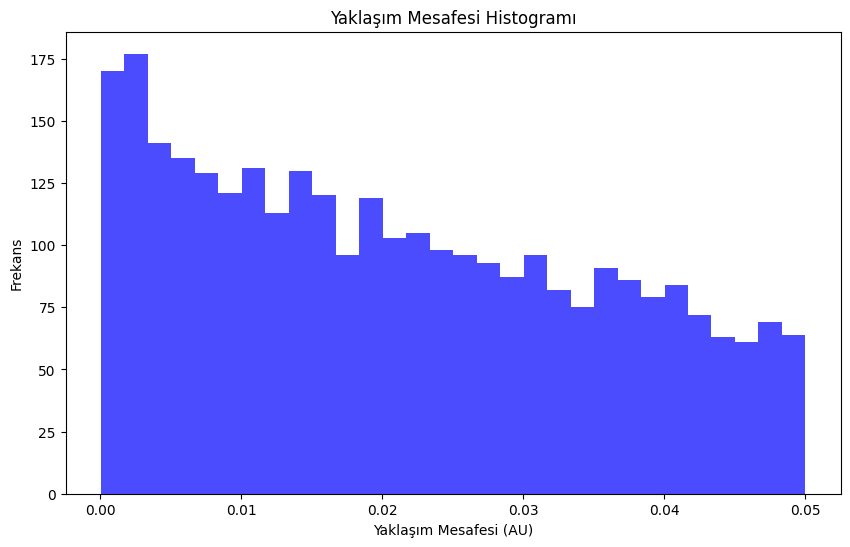

In [10]:
# 'dist' sütununun histogramını çiz
plt.figure(figsize=(10, 6))
plt.hist(df_closes_approach['dist'], bins=30, color='blue', alpha=0.7)
plt.title('Yaklaşım Mesafesi Histogramı')
plt.xlabel('Yaklaşım Mesafesi (AU)')
plt.ylabel('Frekans')
plt.show()

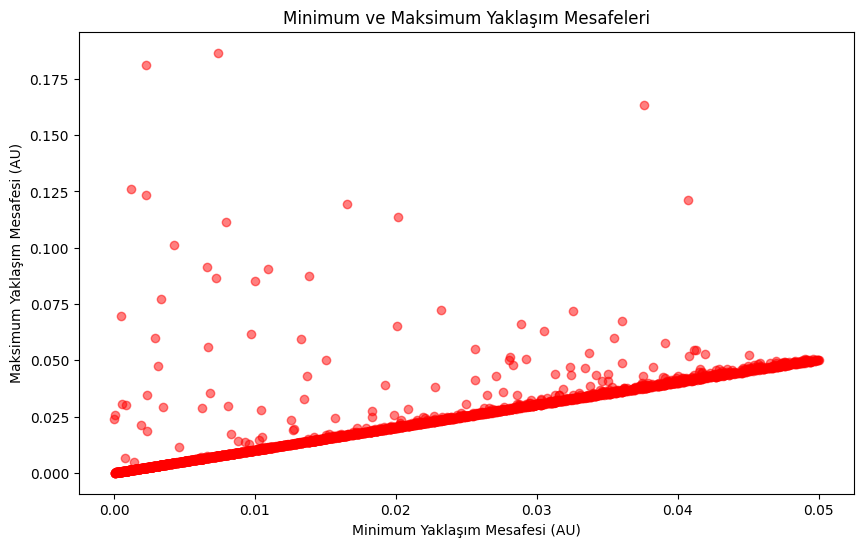

In [11]:
# 'dist_min' ve 'dist_max' sütunlarının birbirine karşı scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(df_closes_approach['dist_min'], df_closes_approach['dist_max'], color='red', alpha=0.5)
plt.title('Minimum ve Maksimum Yaklaşım Mesafeleri')
plt.xlabel('Minimum Yaklaşım Mesafesi (AU)')
plt.ylabel('Maksimum Yaklaşım Mesafesi (AU)')
plt.show()